In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from import_process_dataset import import_process_real_estate

df_analyze, target, continuous_attributes = import_process_real_estate()

In [14]:
0.05 * df.shape[0]


294.55

In [18]:
# # Tree divergence

true_class_name = "class"
pred_class_name = "predicted"
cols_c = [true_class_name, pred_class_name]
metric = 'd_outcome'


type_criterion="divergence_criterion"
type_experiment = "one_at_time"
min_support_tree = 0.1



if metric == 'd_outcome':
    from tree_discretization_ranking import TreeDiscretization_ranking

    tree_discr = TreeDiscretization_ranking()

    # ## Extract tree
    generalization_dict, discretizations = tree_discr.get_tree_discretization(
        df_analyze,
        type_splitting=type_experiment,
        min_support=min_support_tree,
        metric=metric,
        continuous_attributes=list(continuous_attributes),
        type_criterion=type_criterion,
        storeTree=True,
        target_col=target
    )
else:
    from tree_discretization import TreeDiscretization

    tree_discr = TreeDiscretization()

    # ## Extract tree
    generalization_dict, discretizations = tree_discr.get_tree_discretization(
        df_analyze,
        type_splitting=type_experiment,
        min_support=min_support_tree,
        metric=metric,
        class_map=class_map,
        continuous_attributes=list(continuous_attributes),
        class_and_pred_names=cols_c,
        storeTree=True,
        type_criterion=type_criterion, 
        #minimal_gain = 0.0015
    )

In [19]:
tree_discr.printDiscretizationTrees(round_v = 2)

YearBuilt
 root s=1.00 --> d_outcome=0.00
         YearBuilt<=2005 s=0.43 --> d_outcome=-72504.02
                 YearBuilt<=1992 s=0.17 --> d_outcome=-88578.96
                 YearBuilt>=1993 s=0.26 --> d_outcome=-62170.13
                         YearBuilt<=2003 s=0.13 --> d_outcome=-69460.66
                         YearBuilt>=2005 s=0.13 --> d_outcome=-54365.20
         YearBuilt>=2006 s=0.57 --> d_outcome=53713.82
                 YearBuilt<=2007 s=0.32 --> d_outcome=81196.18
                         YearBuilt<=2006 s=0.11 --> d_outcome=28591.48
                         YearBuilt>=2007 s=0.21 --> d_outcome=109753.01
                 YearBuilt>=2008 s=0.25 --> d_outcome=18947.00

YrSold
 root s=1.00 --> d_outcome=0.00
         YrSold<=2012 s=0.46 --> d_outcome=-40559.76
                 YrSold<=2010 s=0.28 --> d_outcome=-47868.02
                         YrSold<=2009 s=0.18 --> d_outcome=-32605.29
                         YrSold>=2010 s=0.11 --> d_outcome=-73000.96
              

In [20]:

out_support = {}
out_time = {}
out_fp = {}





In [67]:
min_sup_divergences = [0.15, 0.2]



In [68]:
# # Extract patterns



import time

for apply_generalization in [False, True]:
    type_gen = 'generalized' if apply_generalization else 'base'
    print(type_gen)
    for keep in [True]:
        if keep:
            keep_items = tree_discr.get_keep_items_associated_with_divergence()
            keep_str = "_pruned"
        else:
            keep_items = None
            keep_str = ""
        print(keep_str)
        for min_sup_divergence in min_sup_divergences:
            print(min_sup_divergence, end = " ")
            s_time = time.time()
            
            if metric == 'd_outcome':
                from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                FP_fm = extract_divergence_generalized(
                df_analyze,
                discretizations,
                generalization_dict,
                continuous_attributes,
                min_sup_divergence=min_sup_divergence,
                apply_generalization=apply_generalization,
                target_name=target,
                metrics_divergence = [metric],
                FPM_type="fpgrowth",
                save_in_progress = False, 
                keep_only_positive_divergent_items=keep_items
                )
            else:

                from utils_extract_divergence_generalized import  extract_divergence_generalized
                FP_fm = extract_divergence_generalized(
                    df_analyze,
                    discretizations,
                    generalization_dict,
                    continuous_attributes,
                    min_sup_divergence=min_sup_divergence,
                    apply_generalization=apply_generalization,
                    true_class_name=true_class_name,
                    predicted_class_name=pred_class_name,
                    class_map=class_map,
                    metrics_divergence = [metric],
                    FPM_type="fpgrowth",
                    save_in_progress = False, 
                    keep_only_positive_divergent_items=keep_items
                )

            key = type_gen + keep_str

            out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time

            print(f"({(time.time()-s_time):.2f})")

            most_divergent = max(FP_fm[metric])
            
            out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

            out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)



base
_pruned
0.15 1 10000
(0.76)
0.2 (0.55)
generalized
_pruned
0.15 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
16 160000
17 170000
18 180000
19 190000
20 200000
21 210000
22 220000
23 230000
24 240000
25 250000
26 260000
27 270000
28 280000
29 290000
30 300000
31 310000
32 320000
33 330000
34 340000
35 350000
36 360000
37 370000


KeyboardInterrupt: 

In [62]:
output_dir = 'output_red'
saveFig = False

from run_pruned_v2 import get_predefined_color_labels, abbreviateValue

dataset_name = 'german'

save = False

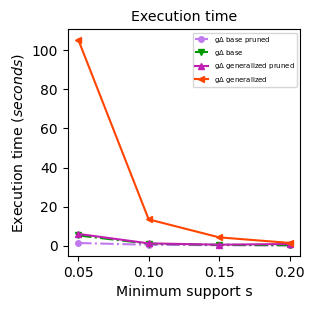

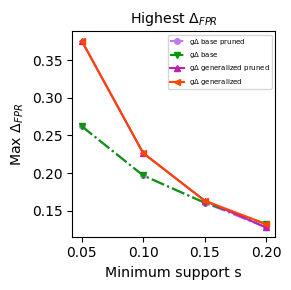

In [63]:


import os
output_fig_dir = os.path.join(os.path.curdir, output_dir, "figures", "output_performance")

if saveFig:


    from pathlib import Path

    Path(output_fig_dir).mkdir(parents=True, exist_ok=True)


abbreviations = {"one_at_time":"indiv t.", \
         "divergence_criterion":"g$\\Delta$", "entropy":"entr"}



color_labels = get_predefined_color_labels(abbreviations)
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})



from utils_plot import plotDicts



info_plot = {}
for sup in sorted(out_time.keys()):
    for type_gen in out_time[sup]:
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_time[sup][type_gen]


size_fig = (3,3)


info_i = "time"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")




plotDicts(info_plot, marker=True, \
        title = 'Execution time', sizeFig=size_fig,\
                linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name)


# ## Plot max_fpr





info_plot = {}
for sup in sorted(out_support.keys()):
    for type_gen in out_support[sup]:
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_support[sup][type_gen]


size_fig = (3,3)


info_i = f"max_{metric}"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")


plotDicts(info_plot, marker=True, \
        title="Highest $\\Delta_{FPR}$" , sizeFig=size_fig,
                linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Max $\\Delta_{FPR}$", labelSize=10.2,\
        outside=False,  saveFig=True, nameFig = figure_name) #yscale="log",  



# # Store performance results

if save:
    import os

    output_results = os.path.join(os.path.curdir, output_dir, 'performance')
    from pathlib import Path

    Path(output_results).mkdir(parents=True, exist_ok=True)

    conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}"

    import json
    with open(os.path.join(output_results, f'{conf_name}_time.json'), 'w') as output_file:
        output_file.write(json.dumps(out_time))


    import json
    with open(os.path.join(output_results, f'{conf_name}_fp.json'), 'w') as output_file:
        output_file.write(json.dumps(out_fp))


    out_support_max = {}


    for sup in sorted(out_support.keys()):
        out_support_max[sup] = {}
        for type_gen in out_support[sup]:
            out_support_max[sup][type_gen] = out_support[sup][type_gen]

    with open(os.path.join(output_results, f'{conf_name}_div.json'), 'w') as output_file:
        output_file.write(json.dumps(out_support_max))


